Verificando/Criando a pasta de destino: Imagens_Gradiente

--- Processando a imagem: FIG034_2.TIF ---
Salvando imagens...
Exibindo resultados...


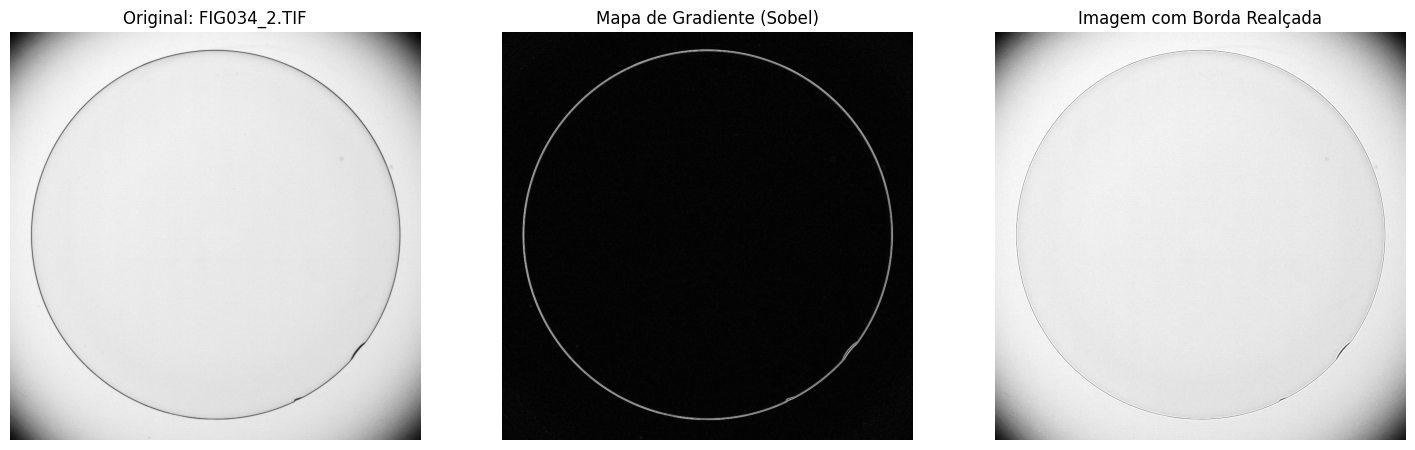


--- Processando a imagem: carro_i_n_01.jpg ---
Salvando imagens...
Exibindo resultados...


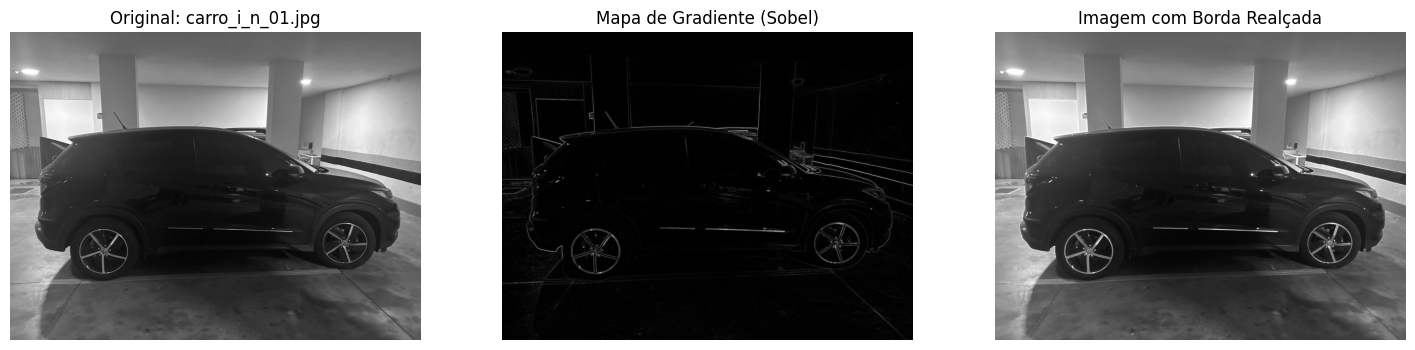



Processo finalizado!


In [1]:


# Passo 1: Importar as bibliotecas necessárias
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, color, filters, exposure
from skimage.util import img_as_ubyte, img_as_float

# --- SEÇÃO DE CONFIGURAÇÃO ---
# Lista de imagens que vamos processar.
IMAGENS_PARA_PROCESSAR = [
    ('Imagens_Atividades', 'FIG034_2.TIF'),
    ('Imagens', 'carro_i_n_01.jpg') 
]

# Pasta onde salvaremos os resultados
PASTA_SAIDA = 'Imagens_Gradiente'
# --------------------------------

# Passo 2: Preparar a pasta de saída
print(f"Verificando/Criando a pasta de destino: {PASTA_SAIDA}")
os.makedirs(PASTA_SAIDA, exist_ok=True)

# Passo 3: Loop para processar cada imagem da lista
for pasta_entrada, nome_imagem in IMAGENS_PARA_PROCESSAR:
    print(f"\n--- Processando a imagem: {nome_imagem} ---")
    
    # Monta o caminho completo da imagem de entrada
    caminho_entrada = os.path.join(pasta_entrada, nome_imagem)
    
    # Carrega a imagem e a converte para float e tons de cinza
    imagem_original = io.imread(caminho_entrada)
    if imagem_original.ndim == 3:
        imagem_cinza_float = img_as_float(color.rgb2gray(imagem_original))
    else:
        imagem_cinza_float = img_as_float(imagem_original)
    
    # --- APLICAÇÃO DA TÉCNICA ---
    
    # 1. Aplicar o filtro de Sobel para obter o mapa de gradiente
    mapa_gradiente = filters.sobel(imagem_cinza_float)
    
    # 2. Realçar a imagem somando o gradiente à original
    imagem_realcada = imagem_cinza_float + mapa_gradiente
    
    # 3. Garantir que os valores dos pixels fiquem na faixa válida [0, 1]
    imagem_realcada = np.clip(imagem_realcada, 0, 1)

    # --- SALVANDO AS IMAGENS RESULTANTES ---
    print("Salvando imagens...")
    nome_base = nome_imagem.split('.')[0]
    
    # O mapa de gradiente precisa ser normalizado para ser salvo como imagem visível
    gradiente_salvavel = img_as_ubyte(exposure.rescale_intensity(mapa_gradiente, out_range=(0, 1)))
    io.imsave(os.path.join(PASTA_SAIDA, f'{nome_base}_gradiente.jpg'), gradiente_salvavel)

    # Salvando a imagem realçada
    io.imsave(os.path.join(PASTA_SAIDA, f'{nome_base}_realcada.jpg'), img_as_ubyte(imagem_realcada))

    # --- VISUALIZAÇÃO DOS RESULTADOS ---
    print("Exibindo resultados...")
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    axes[0].imshow(imagem_cinza_float, cmap='gray')
    axes[0].set_title(f'Original: {nome_imagem}')
    axes[0].axis('off')

    axes[1].imshow(gradiente_salvavel, cmap='gray')
    axes[1].set_title('Mapa de Gradiente (Sobel)')
    axes[1].axis('off')

    axes[2].imshow(imagem_realcada, cmap='gray')
    axes[2].set_title('Imagem com Borda Realçada')
    axes[2].axis('off')

    plt.show()

print("\n\nProcesso finalizado!")